### Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
Using natural gas data set, decision trees are generated to learn from data to approximate a gas prices with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

#### The Natural Gas Data Set
We will start by looking at the natural gas data set again. The DecisionTreeClassifier would take as input two arrays: an array X, of size [n_samples, n_features] holding the training samples of four parameters (Average Coal Price, Oil Price, Gas Consumption and Gas Production), and an array Y of integer values, size [n_samples], holding the class labels (Gas Price Status) for the training samples:

First, let us import the data set:


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
#load the data for analysis
dflog=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
dflog.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


In [3]:
#Change the columns name to create attributes and features
dflog.columns = ['DAYS', 'DATE', 'COALP', 'OILP', 'GPROD', 'GCONS', 'GASP', 'WEATH', 'WSTAT', 'GPSTAT', 'GPSAT', 'COL']
dflog.head()

,DAYS,DATE,COALP,OILP,GPROD,GCONS,GASP,WEATH,WSTAT,GPSTAT,GPSAT,COL
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


Let us focus on the five key features of interest:

In [4]:
dfnum = dflog[['COALP', 'OILP', 'GPROD', 'GCONS', 'GASP']]
dfnum.head()

,COALP,OILP,GPROD,GCONS,GASP
0,57.22,41.12,2227.028,2399.702,5.82
1,54.37,41.71,2251.938,2729.715,5.24
2,52.30,39.09,2074.167,2332.539,4.52
3,44.34,47.94,2262.488,2170.709,3.96
4,41.92,49.65,2147.856,1741.293,3.50


We will now split the data into a training and test (hold-out) set and test for accuracy on the testing set. We will generate a  classification of natural gas price determinants and use the Gas Price Status as the target.

In [31]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split


# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['COALP', 'OILP', 'GPROD', 'GCONS']].values, 
                                              (dflog.GPSAT == 0).values,random_state=5)


### Classification
DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. Let us generate DecisionTreeClassifiers for our data set and fit the training set

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xlr, ylr)

After being fitted, the model can then be used to predict the class of samples:

In [33]:
clf.predict(Xtestlr)

array([False, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, False], dtype=bool)

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [34]:
clf.predict_proba(Xtestlr)

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification. Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. 

In [35]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


Automatically created module for IPython interactive environment


In [36]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

### Regression
In this section, DecisionTree is used to carry out regression on the natural gas data set. Let us start by importing the necessary modules and libraries.

In [38]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


We will now split the data into a training and test (hold-out) set and test for accuracy on the testing set. We will generate a classification of natural gas price determinants and use the Gas Prices as the target.

In [45]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split


# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['COALP', 'OILP', 'GPROD', 'GCONS']].values, 
                                              (dflog.GASP).values,random_state=5)


Let us now fit regression model with max_depth equal to 2 and 5

In [46]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(Xlr, ylr)
regr_2.fit(Xlr, ylr)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

We will now carry out prediction on the test data

In [47]:
# Predict
y_1 = regr_1.predict(Xtestlr)
y_2 = regr_2.predict(Xtestlr)

Finally, we plot the result

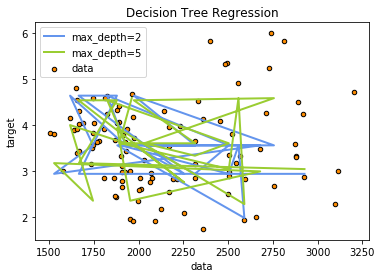

In [49]:
# Plot the results for GAS price vs GAS consumption
plt.figure()
plt.scatter(dflog.GCONS, dflog.GASP, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(Xtestlr[:,3], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(Xtestlr[:,3], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

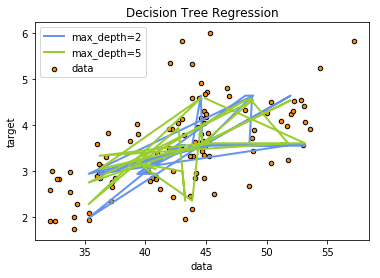

In [51]:
# Plot the results for GAS price vs Coal Price
plt.figure()
plt.scatter(dflog.COALP, dflog.GASP, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(Xtestlr[:,0], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(Xtestlr[:,0], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

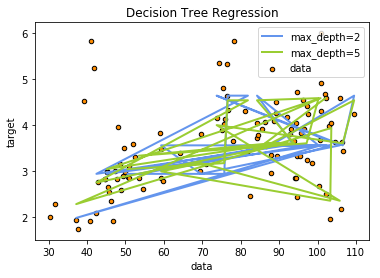

In [53]:
# Plot the results for GAS price vs Oil price
plt.figure()
plt.scatter(dflog.OILP, dflog.GASP, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(Xtestlr[:,1], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(Xtestlr[:,1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

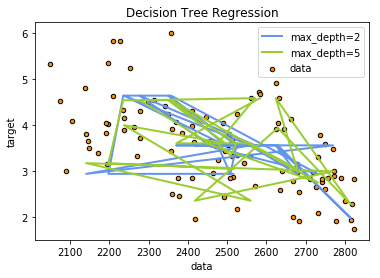

In [54]:
# Plot the results for GAS price vs GAS Production
plt.figure()
plt.scatter(dflog.GPROD, dflog.GASP, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(Xtestlr[:,2], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(Xtestlr[:,2], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

The decision trees is used to fit these noisy observations. As a result, it learns local linear regressions approximating the Gas Price curve. We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

#### Regression against time
In this section, DecisionTree is used to carry out regression on the natural gas data set (speciifcally Gas Price bs Time). Let us start by importing the necessary modules and libraries.

In [55]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


Let us split the data into a training and test and test for accuracy on the testing set. We will generate a classification of time and use the Gas Prices as the target.

In [56]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split


# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['DAYS']].values, 
                                              (dflog.GASP).values,random_state=5)


In [57]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(Xlr, ylr)
regr_2.fit(Xlr, ylr)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [58]:
# Predict
y_1 = regr_1.predict(Xtestlr)
y_2 = regr_2.predict(Xtestlr)

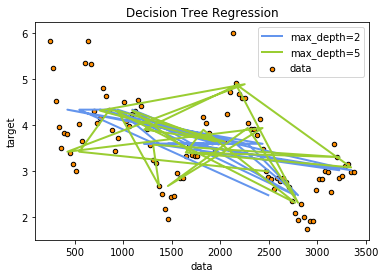

In [59]:
# Plot the results for GAS price vs GAS consumption
plt.figure()
plt.scatter(dflog.DAYS, dflog.GASP, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(Xtestlr[:,0], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(Xtestlr[:,0], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [62]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['COALP', 'OILP','GPROD','GCONS']].values, 
                                              (dflog.GPSAT == 0).values,random_state=5)


In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score (clf, Xlr, ylr)
scores.mean() 

0.67669515669515679